<a href="https://colab.research.google.com/github/Alton1998/Scoliosis/blob/main/NuSVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
X_train_reg = []
X_test_reg = []
X_val_reg = []
y_train_reg = []
y_test_reg = []
y_val_reg = []
with open("X_train_reg.pkl","rb") as f1, open("X_test_reg.pkl","rb") as f2, open("X_val_reg.pkl","rb") as f3, open("y_train_reg.pkl","rb") as f4, open("y_test_reg.pkl","rb") as f5, open("y_val_reg.pkl","rb") as f6:
  X_train_reg = pickle.load(f1)
  X_test_reg = pickle.load(f2)
  X_val_reg = pickle.load(f3)
  y_train_reg = pickle.load(f4)
  y_test_reg = pickle.load(f5)
  y_val_reg = pickle.load(f6)

In [3]:
X_train_reg = X_train_reg.values
X_test_reg = X_test_reg.values
X_val_reg = X_val_reg.values
y_train_reg = y_train_reg.values
y_test_reg = y_test_reg.values
y_val_reg = y_val_reg.values

In [4]:
X_train_reg

array([[ 13.  , 165.1 ,   7.  , ...,   0.  ,   1.  ,   0.  ],
       [ 14.  , 169.  ,   9.  , ...,   1.  ,   0.  ,   0.  ],
       [  9.  , 135.8 ,  11.  , ...,   0.  ,   0.  ,   0.  ],
       ...,
       [ 15.  , 158.75, -13.  , ...,   1.  ,   0.  ,   0.  ],
       [ 15.  , 147.  ,  17.  , ...,   0.  ,   1.  ,   0.  ],
       [ 11.  , 146.  , -10.  , ...,   1.  ,   0.  ,   0.  ]])

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()


In [7]:
# Scaling the data based on training
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)
X_val_reg = scaler.transform(X_val_reg)

In [8]:
from sklearn.svm import NuSVR
clf = NuSVR(C=1.0,nu=0.1)

In [9]:
clf.fit(X_train_reg,y_train_reg)

NuSVR(nu=0.1)

In [10]:
y_val_pred = clf.predict(X_val_reg)

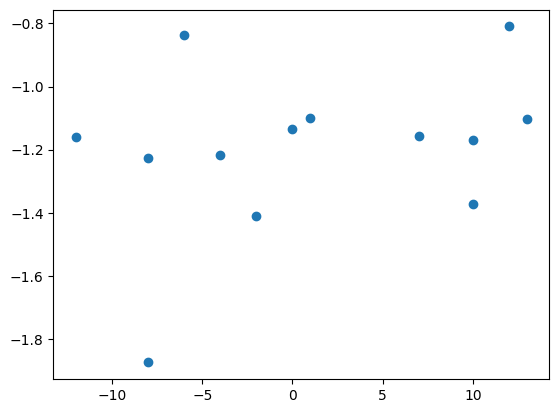

In [11]:
plt.scatter(y_val_reg,y_val_pred) # this should be a straight line essentially

In [12]:
y_test_pred = clf.predict(X_test_reg)

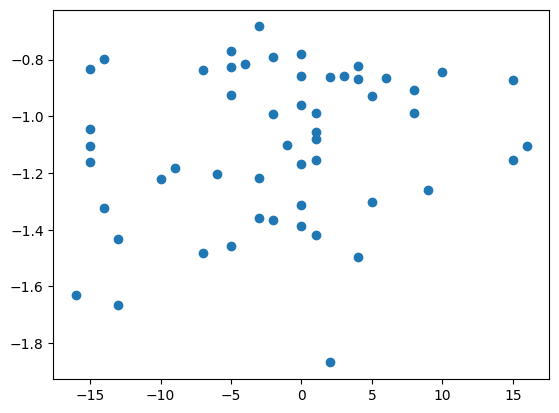

In [13]:
plt.scatter(y_test_reg,y_test_pred)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [15]:
mean_absolute_error(y_test_reg,y_test_pred)

6.229148848063268

In [16]:
mean_squared_error(y_test_reg,y_test_pred)

63.359355089808766